Step 1: Install Required Libraries

In [1]:
!pip install pandas numpy nltk scikit-learn matplotlib wordcloud

Step 2: Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Step 3: Load the Dataset

In [3]:
# Example: Specify the full file path if the CSV is not in the same directory
import pandas as pd
df = pd.read_csv("C:/Users/shree/Downloads/Reviews.csv.zip")

# Display the first few rows of the dataset
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Step 4: Data Preprocessing
Define a preprocessing function to clean the text.

In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the 'punkt' tokenizer
nltk.download('punkt_tab')

# Download other necessary resources
nltk.download('stopwords')
nltk.download('wordnet')


# Sample data
df = pd.read_csv("C:/Users/shree/Downloads/Reviews.csv.zip")

# Map ratings to sentiments
df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x >= 4 else ('Negative' if x <= 2 else 'Neutral'))

# Preprocessing example (removing stop words, tokenizing, lemmatizing)
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(tokens)

df['Processed_Review'] = df['Text'].apply(preprocess_text)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
print(df.columns)


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [5]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Map Ratings to Sentiment
We’ll map the ratings to three sentiment categories.

In [6]:
def map_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Score'].apply(map_sentiment)
df[['Summary', 'Text']].head()


,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


Step 5: Exploratory Data Analysis (EDA)
Plot Sentiment Distribution

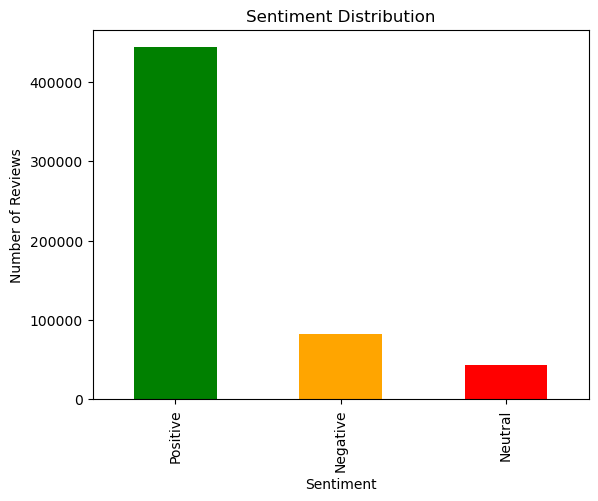

In [7]:
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


Generate a Word Cloud for Positive Reviews

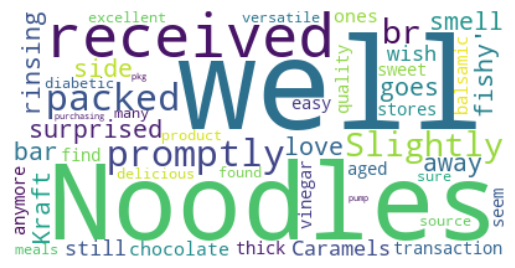

In [8]:
# Check if there are any positive reviews and that they contain words after preprocessing
positive_reviews = " ".join(df[df['Summary'] == 'Positive']['Text'].dropna())

if len(positive_reviews) > 0:  # Ensure there is at least 1 word
    # Generate and display the word cloud
    wordcloud = WordCloud(max_words=100, background_color="white").generate(positive_reviews)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
else:
    print("No valid positive reviews found to generate a word cloud.")


Step 6: Feature Extraction Using TF-IDF
Convert the preprocessed text into numerical vectors using TF-IDF.

In [10]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Step 1: Download NLTK resources (make sure this step is done)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Step 2: Function to clean and preprocess the text data
def preprocess_text(text):
    if isinstance(text, str):  # Ensure the input is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\W', ' ', text)  # Remove non-word characters
        tokens = word_tokenize(text)  # Tokenize the text
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]
        return " ".join(tokens)
    return ""

# Step 3: Load dataset
df = pd.read_csv("C:/Users/shree/Downloads/Reviews.csv.zip")  # Make sure this file path is correct

# Step 4: Apply preprocessing to each text
df['Processed_Review'] = df['Text'].apply(preprocess_text)

# Step 5: TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Processed_Review'])

# Step 6: Splitting data
# Assuming there's a target column called 'Score' for prediction
y = df['Score']  # Replace 'Score' with your actual target variable name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if everything is working
print(X_train.shape, X_test.shape)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(454763, 5000) (113691, 5000)


Step 7: Build and Train the Sentiment Classification Model
We'll start with Logistic Regression, a common classifier for text data.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.63      0.68      0.65     10326
           2       0.43      0.17      0.24      5855
           3       0.44      0.27      0.34      8485
           4       0.49      0.22      0.30     16123
           5       0.79      0.95      0.86     72902

    accuracy                           0.73    113691
   macro avg       0.55      0.46      0.48    113691
weighted avg       0.69      0.73      0.69    113691



C:\Users\shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix

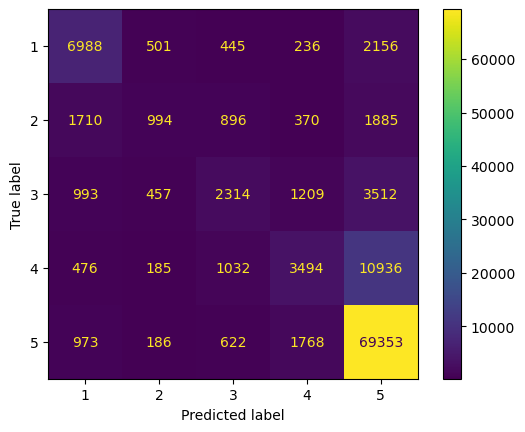

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


Step 9: Business Insights and Recommendations

In [14]:
def predict_sentiment(review):
    review_processed = preprocess_text(review)
    review_vectorized = tfidf.transform([review_processed])
    return model.predict(review_vectorized)[0]

# Test the function
new_review = "This product was amazing! Very easy to use and reliable."
print(f"Predicted Sentiment: {predict_sentiment(new_review)}")


Predicted Sentiment: 5
